# Canadian rent model for 2024

Rent has been increasing a lot throughout the years, and it is hard to calculate how much they can value. I will be to create a model that can try to accurately predict the prices of the rent based of the rents of year 2024 

## Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
sns.set_theme()

## Data Exploration

In [35]:
df=pd.read_csv("Documents/rentfaster.csv")
df

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25767,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,1450.0,3 Beds,1,810,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25768,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,1125.0,1 Bed,1,520,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
25769,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True


In [37]:
df.columns

Index(['rentfaster_id', 'city', 'province', 'address', 'latitude', 'longitude',
       'lease_term', 'type', 'price', 'beds', 'baths', 'sq_feet', 'link',
       'furnishing', 'availability_date', 'smoking', 'cats', 'dogs'],
      dtype='object')

In [39]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

## Data Analysis

#### Find the mean of price in all provinces. Which province is the most expensive?

In [113]:
provinces=df.groupby('province')['price'].mean().reset_index()
provinces

,province,price
0,Alberta,2057.428407
1,British Columbia,2492.931820
2,Manitoba,1674.843820
3,New Brunswick,1365.538462
4,Newfoundland and Labrador,1067.083333
5,Northwest Territories,1877.500000
6,Nova Scotia,2162.666441
7,Ontario,2462.598179
8,Quebec,2097.628422
9,Saskatchewan,1348.745879


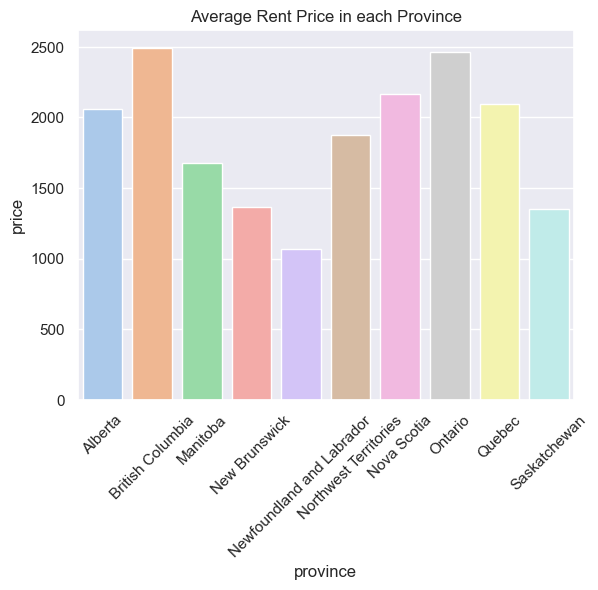

In [117]:
sns.barplot(provinces,x='province', y='price', hue='province', palette='pastel')
plt.xticks(rotation=45)
plt.title('Average Rent Price in each Province')
plt.show()

In [65]:
print('The province with the highest rent price is:', provinces.idxmax())

The province with the highest rent price is: British Columbia


### What are the correlations between the numeric columns?


In [70]:
corr=df.corr(numeric_only=True)
corr

,rentfaster_id,latitude,longitude,price
rentfaster_id,1.000000,-0.180919,0.169395,0.150541
latitude,-0.180919,1.000000,-0.892029,-0.214687
longitude,0.169395,-0.892029,1.000000,0.109689
price,0.150541,-0.214687,0.109689,1.000000


<Axes: >

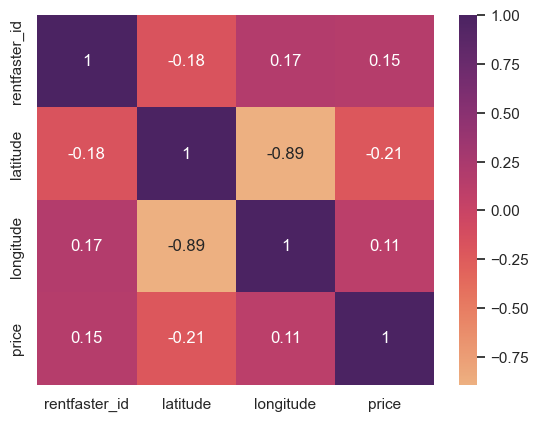

In [72]:
sns.heatmap(corr, annot=True, cmap='flare')

As we can see here, the latitude and the longitude have the highest correlation, although, it is a negative. The one with the highest correlation based with the price however, is the latitude, althought also negative.

#### which top 5 cities are the most expensive and which top 5 cities are the less expensive to rent?

In [119]:
cities=df.groupby('city')['price'].mean().sort_values(ascending=False).reset_index()
cities

,city,price
0,Horseshoe Bay,9800.000000
1,De Winton,6500.000000
2,Canmore,5005.625000
3,West Vancouver,4400.028333
4,Squamish,4175.000000
...,...,...
264,Outlook,775.000000
265,Taylor,725.000000
266,Fort Nelson,656.666667
267,Ridgetown,650.000000


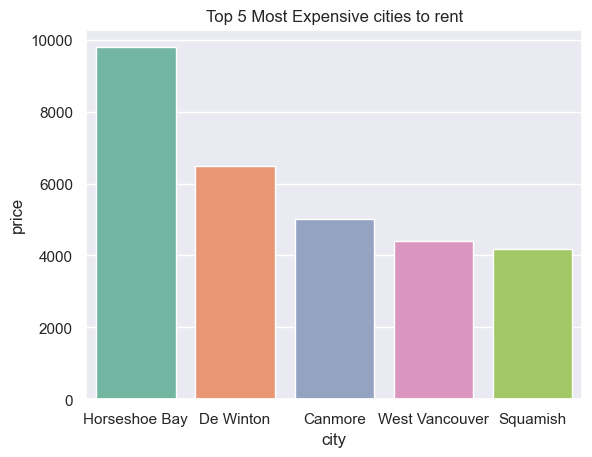

In [135]:
#expensive cities 
most_expensive=cities[:5]
sns.barplot(most_expensive, x='city', y='price', hue='city', palette='Set2')
plt.title('Top 5 Most Expensive cities to rent')
plt.show()

Text(0.5, 1.0, 'Top 5 Most Cheap cities to rent')

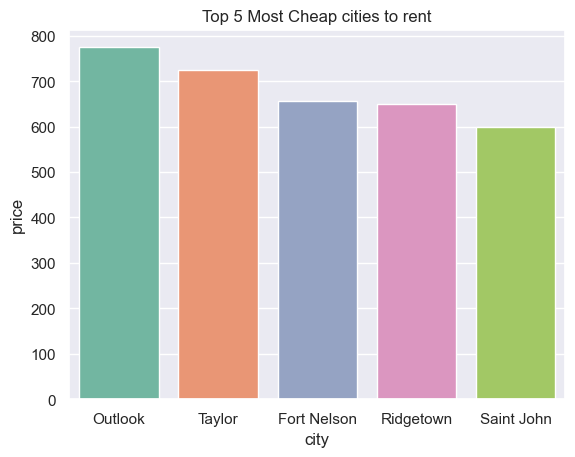

In [137]:
#cheaper cities
cheap_cities=cities[-5:]
sns.barplot(cheap_cities, x='city', y='price', hue='city', palette='Set2')
plt.title('Top 5 Most Cheap cities to rent')

In [ ]:
#based on the city, are they more at ease with the cats and dogs or not.

In [ ]:
# is the price affected by the number of rooms and baths

In [ ]:
# what days are the most common to move

## Data Preprocessing

#### Null Values

In [12]:
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [13]:
#drop unnessary columns
df=df.drop(columns=['rentfaster_id', 'link','address'])

In [14]:
# making the nan values 0 
values={'beds':'0 bed', 'baths':0}
df=df.fillna(value=values)

In [15]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent') #since most of the dtypes are objects, its best to use 'most_fequent'

In [16]:
df['lease_term']= imputer.fit_transform(df[['lease_term']]).ravel()
df['lease_term'].isnull().sum()

0

In [17]:
df['availability_date']= imputer.fit_transform(df[['availability_date']]).ravel()
df['availability_date'].isnull().sum()

0

In [18]:
df['smoking']= imputer.fit_transform(df[['smoking']]).ravel()
df['smoking'].isnull().sum()

0

In [19]:
df['cats']= imputer.fit_transform(df[['cats']]).ravel()
df['cats'].isnull().sum()

0

In [20]:
df['dogs']= imputer.fit_transform(df[['dogs']]).ravel()
df['dogs'].isnull().sum()

0

In [21]:
# some values have letters and characters in them, so we need to remove them
df['sq_feet']=df['sq_feet'].str.replace(r'\D','',regex=True) 

In [22]:
df['sq_feet'].loc[df['sq_feet']==''] #some rows hd empty strings, so we need to find them and replace them with NaN

963      
2566     
8771     
10268    
11818    
Name: sq_feet, dtype: object

In [23]:
df['sq_feet']=df['sq_feet'].replace('', np.nan)

In [24]:
imputermean=SimpleImputer(strategy='mean')
df['sq_feet']=imputermean.fit_transform(df[['sq_feet']]).ravel()

In [25]:
df['sq_feet'].isnull().sum()

0

In [26]:
df.isnull().sum()

city                 0
province             0
latitude             0
longitude            0
lease_term           0
type                 0
price                0
beds                 0
baths                0
sq_feet              0
furnishing           0
availability_date    0
smoking              0
cats                 0
dogs                 0
dtype: int64

#### Encoding Categorical Values

In [28]:
df.dtypes

city                  object
province              object
latitude             float64
longitude            float64
lease_term            object
type                  object
price                float64
beds                  object
baths                 object
sq_feet              float64
furnishing            object
availability_date     object
smoking               object
cats                  object
dogs                  object
dtype: object

In [29]:
df['cats']=df['cats'].astype(int)
df['dogs']=df['dogs'].astype(int)
#They are booleans so can become 1 or 0

In [30]:
df['baths'].unique()

array(['2.5', '1', '2', '1.5', '3.5', 0, '4', '3', '5', 'none', '4.5',
       '7.5', '5.5', '6', '6.5', '7', '8', '0'], dtype=object)

In [31]:
# since we only have none as string, its best to just manually change it into a 0
df['baths'] = df['baths'].replace({'none': 0})
df['baths']=df['baths'].astype(float)
df['baths'].unique()

array([2.5, 1. , 2. , 1.5, 3.5, 0. , 4. , 3. , 5. , 4.5, 7.5, 5.5, 6. ,
       6.5, 7. , 8. ])

In [32]:
df['beds'].unique()

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds', '0 bed',
       '6 Beds', 'none Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

In [33]:
df['beds'] = df['beds'].replace({'Studio': '0 bed', 'none Beds': '0 bed'})
#these values as well represent 0, so we will manually change it.

In [34]:
df['beds']=df['beds'].str.replace(r'\D','', regex=True)
#the string has a number on them already, so just taking the numbers from the strings and 
#transforming it into int, will be best.
df['beds'].unique()


array(['2', '3', '0', '1', '5', '4', '6', '8', '7', '9'], dtype=object)

In [35]:
df['beds']=df['beds'].astype(int)

In [36]:
df['furnishing'].unique() #Checking which ones has the low unique values

array(['Unfurnished', 'Furnished', 'Negotiable',
       'Unfurnished, Negotiable'], dtype=object)

In [37]:
df['availability_date'].unique()

array(['Immediate', 'November 18', 'July 01', 'August 01', 'June 15',
       'July 31', 'June 30', 'July 15', 'July 07', 'July 18', 'August 07',
       'August 15', 'September 01', 'Negotiable', 'No Vacancy', 'June 14',
       'July 04', 'July 05', 'August 06', 'July 11', 'June 19',
       'Call for Availability', 'September 07', 'July 12', 'June 17',
       'October 03', 'June 25', 'June 18', 'August 23', 'July 23',
       'July 02', 'October 01', 'July 08', 'June 16', 'June 20',
       'June 21', 'June 22', 'June 23', 'June 24', 'June 26', 'June 28',
       'June 29', 'July 22', 'November 01', 'July 03', 'July 09',
       'July 06', 'July 10', 'July 16', 'July 17', 'July 20', 'July 27',
       'July 30', 'August 02', 'August 04', 'August 05', 'August 09',
       'August 10', 'August 11', 'August 16', 'August 20', 'August 22',
       'August 25', 'August 26', 'August 29', 'August 30', 'August 31',
       'September 02', 'September 03', 'September 05', 'September 08',
       'September

In [38]:
#I notice how there are many dates, if we encoded, it would lead to either unneccessary features(OneHotEncoder) or 
#the model will interpret the model with an order and we dont want that
#so, i just remove the dates, and leave it as months instead
df['availability_date']=df['availability_date'].str.replace(r'\d+','', regex=True)
df['availability_date']

0        Immediate
1        Immediate
2        Immediate
3        November 
4        Immediate
           ...    
25766    Immediate
25767    Immediate
25768    Immediate
25769    Immediate
25770    Immediate
Name: availability_date, Length: 25771, dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc1=LabelEncoder()
enc2=OneHotEncoder(drop='first', sparse_output = False)

In [40]:
df['city']=enc1.fit_transform(df['city'])
df['city']
#used labelEncoder because there are to many cities

0          1
1          1
2          1
3          1
4          1
        ... 
25766    268
25767    268
25768    268
25769    268
25770    268
Name: city, Length: 25771, dtype: int32

In [41]:
df['province']=enc1.fit_transform(df['province'])
df['province']

0        0
1        0
2        0
3        0
4        0
        ..
25766    9
25767    9
25768    9
25769    9
25770    9
Name: province, Length: 25771, dtype: int32

In [42]:
hot_encoded_cols= enc2.fit_transform(df[['lease_term', 'type', 'furnishing', 'availability_date', 'smoking']])
hot_encoded_cols

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [43]:
new_features=enc2.get_feature_names_out(['lease_term', 'type', 'furnishing', 'availability_date', 'smoking'])
new_features

array(['lease_term_6 months', 'lease_term_Long Term',
       'lease_term_Negotiable', 'lease_term_Short Term',
       'lease_term_months', 'type_Apartment', 'type_Basement',
       'type_Condo Unit', 'type_Duplex', 'type_House', 'type_Loft',
       'type_Main Floor', 'type_Mobile', 'type_Office Space',
       'type_Parking Spot', 'type_Room For Rent', 'type_Storage',
       'type_Townhouse', 'type_Vacation Home', 'furnishing_Negotiable',
       'furnishing_Unfurnished', 'furnishing_Unfurnished, Negotiable',
       'availability_date_Call for Availability',
       'availability_date_December ', 'availability_date_February ',
       'availability_date_Immediate', 'availability_date_January ',
       'availability_date_July ', 'availability_date_June ',
       'availability_date_March ', 'availability_date_May ',
       'availability_date_Negotiable', 'availability_date_No Vacancy',
       'availability_date_November ', 'availability_date_October ',
       'availability_date_September ', 

In [44]:
new_df=pd.DataFrame(hot_encoded_cols, columns=new_features)
new_df

,lease_term_6 months,lease_term_Long Term,lease_term_Negotiable,lease_term_Short Term,lease_term_months,type_Apartment,type_Basement,type_Condo Unit,type_Duplex,type_House,...,availability_date_March,availability_date_May,availability_date_Negotiable,availability_date_No Vacancy,availability_date_November,availability_date_October,availability_date_September,smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25767,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25768,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25769,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
df=df.drop(columns=['lease_term', 'type', 'furnishing', 'availability_date', 'smoking']).join(new_df)
df

,city,province,latitude,longitude,price,beds,baths,sq_feet,cats,dogs,...,availability_date_March,availability_date_May,availability_date_Negotiable,availability_date_No Vacancy,availability_date_November,availability_date_October,availability_date_September,smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed
0,1,0,51.305962,-114.012515,2495.0,2,2.5,1403.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,51.305962,-114.012515,2695.0,3,2.5,1496.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,51.305962,-114.012515,2295.0,2,2.5,1180.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,51.305962,-114.012515,2095.0,2,2.5,1403.0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,51.305962,-114.012515,2495.0,2,2.5,1403.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,268,9,51.203024,-102.484782,920.0,0,1.0,400.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25767,268,9,51.203024,-102.484782,1450.0,3,1.0,810.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25768,268,9,51.202667,-102.485765,1125.0,1,1.0,520.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25769,268,9,51.202667,-102.485765,920.0,0,1.0,400.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
df.dtypes

city                                         int32
province                                     int32
latitude                                   float64
longitude                                  float64
price                                      float64
beds                                         int32
baths                                      float64
sq_feet                                    float64
cats                                         int32
dogs                                         int32
lease_term_6 months                        float64
lease_term_Long Term                       float64
lease_term_Negotiable                      float64
lease_term_Short Term                      float64
lease_term_months                          float64
type_Apartment                             float64
type_Basement                              float64
type_Condo Unit                            float64
type_Duplex                                float64
type_House                     

### Selecting Best Features

In [111]:
df.corr() #looking at which has the best correlation with price

,city,province,latitude,longitude,price,beds,baths,sq_feet,cats,dogs,...,availability_date_March,availability_date_May,availability_date_Negotiable,availability_date_No Vacancy,availability_date_November,availability_date_October,availability_date_September,smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed
city,1.000000,0.647931,-0.560319,0.576751,0.073003,-0.219400,-0.186510,-8.855060e-03,0.268898,0.254780,...,0.001065,0.032174,-0.070219,-0.137850,0.082824,-0.008609,0.126993,-0.047648,0.023904,0.080406
province,0.647931,1.000000,-0.845753,0.913153,0.086334,-0.222968,-0.222081,-8.192622e-03,0.268336,0.251376,...,0.007301,0.022539,-0.074196,-0.124761,0.011965,0.009969,0.042679,0.020839,0.001051,-0.007656
latitude,-0.560319,-0.845753,1.000000,-0.892029,-0.214687,0.197370,0.169787,5.781358e-03,-0.202367,-0.202473,...,-0.002239,-0.023507,0.059117,0.088179,-0.014566,-0.006896,-0.032286,-0.001563,-0.025853,0.012722
longitude,0.576751,0.913153,-0.892029,1.000000,0.109689,-0.205636,-0.192473,-7.435245e-03,0.230072,0.205392,...,0.008089,0.022004,-0.068270,-0.099164,0.028806,0.012596,0.078554,0.025265,-0.015951,0.010661
price,0.073003,0.086334,-0.214687,0.109689,1.000000,0.431336,0.489972,9.437575e-03,0.045794,0.088165,...,0.000167,0.000105,0.046612,-0.060513,-0.004138,0.017352,0.007909,0.024674,-0.000298,-0.047474
beds,-0.219400,-0.222968,0.197370,-0.205636,0.431336,1.000000,0.676832,1.249732e-02,-0.144357,-0.104522,...,-0.000743,-0.007268,0.044067,-0.028245,-0.009934,0.001609,-0.009870,0.004049,-0.026918,0.002782
baths,-0.186510,-0.222081,0.169787,-0.192473,0.489972,0.676832,1.000000,9.294761e-03,-0.128117,-0.080872,...,-0.001239,-0.006887,0.044869,0.008128,0.015152,-0.003895,-0.010070,0.016614,-0.019328,-0.017147
sq_feet,-0.008855,-0.008193,0.005781,-0.007435,0.009438,0.012497,0.009295,1.000000e+00,-0.013426,-0.012682,...,-0.000122,-0.000113,-0.000816,-0.001673,-0.000765,-0.000556,-0.001860,0.001503,-0.001199,-0.000685
cats,0.268898,0.268336,-0.202367,0.230072,0.045794,-0.144357,-0.128117,-1.342631e-02,1.000000,0.844985,...,0.007877,-0.017950,-0.063360,0.019495,0.038319,-0.000871,0.030937,-0.036938,0.044624,0.007108
dogs,0.254780,0.251376,-0.202473,0.205392,0.088165,-0.104522,-0.080872,-1.268229e-02,0.844985,1.000000,...,0.008344,-0.016383,-0.058154,0.018683,0.041559,0.002130,0.037344,-0.001599,0.045183,-0.061472


In [48]:
len(df.columns)

49

In [49]:
#Split the data
X=df.drop('price',axis=1)
y=df['price']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [113]:
from sklearn.feature_selection import SelectKBest
selector=SelectKBest(k=37) #selecting more than 75% of the rows
X_train_Selected=selector.fit_transform(X_train,y_train)

In [114]:
features=selector.get_feature_names_out(X.columns)
features

array(['city', 'province', 'latitude', 'longitude', 'beds', 'baths',
       'cats', 'dogs', 'lease_term_Long Term', 'lease_term_Negotiable',
       'lease_term_Short Term', 'type_Apartment', 'type_Basement',
       'type_Condo Unit', 'type_House', 'type_Main Floor',
       'type_Office Space', 'type_Parking Spot', 'type_Room For Rent',
       'type_Storage', 'type_Townhouse', 'type_Vacation Home',
       'furnishing_Negotiable', 'furnishing_Unfurnished',
       'availability_date_Call for Availability',
       'availability_date_December ', 'availability_date_February ',
       'availability_date_Immediate', 'availability_date_July ',
       'availability_date_June ', 'availability_date_No Vacancy',
       'availability_date_November ', 'availability_date_October ',
       'availability_date_September ', 'smoking_Non-Smoking',
       'smoking_Smoke Free Building', 'smoking_Smoking Allowed'],
      dtype=object)

In [117]:
df=df[['price','city', 'province', 'latitude', 'longitude', 'beds', 'baths',
       'cats', 'dogs', 'lease_term_Long Term', 'lease_term_Negotiable',
       'lease_term_Short Term', 'type_Apartment', 'type_Basement',
       'type_Condo Unit', 'type_House', 'type_Main Floor',
       'type_Office Space', 'type_Parking Spot', 'type_Room For Rent',
       'type_Storage', 'type_Townhouse', 'type_Vacation Home',
       'furnishing_Negotiable', 'furnishing_Unfurnished',
       'availability_date_Call for Availability',
       'availability_date_December ', 'availability_date_February ',
       'availability_date_Immediate', 'availability_date_July ',
       'availability_date_June ', 'availability_date_No Vacancy',
       'availability_date_November ', 'availability_date_October ',
       'availability_date_September ', 'smoking_Non-Smoking',
       'smoking_Smoke Free Building', 'smoking_Smoking Allowed']]

### Scaling

In [120]:
X=df.drop('price',axis=1)
y=df['price']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [126]:
X_train_scaled

array([[-0.89443447, -0.83344715,  0.58350051, ...,  0.16262582,
        -0.12255379, -0.08480121],
       [-0.41503801, -0.83344715,  1.29367184, ...,  0.16262582,
        -0.12255379, -0.08480121],
       [-0.89443447, -0.83344715,  0.62862245, ...,  0.16262582,
        -0.12255379, -0.08480121],
       ...,
       [ 1.94409723, -0.2668819 ,  0.24077383, ...,  0.16262582,
        -0.12255379, -0.08480121],
       [-0.89443447, -0.83344715,  0.60288436, ...,  0.16262582,
        -0.12255379, -0.08480121],
       [-0.41503801, -0.83344715,  1.2833949 , ...,  0.16262582,
        -0.12255379, -0.08480121]])